In [1]:
from all_imports import *

import _modules

 ### test init### 


In [2]:
wst_filepath = r'C:\Users\gottk\OneDrive\Storage\Projects\2024-08-00_MTHCOM_Masterthesis-Outdoor-Comfort\Thermal_Walk\MobileWeatherStation'

lst_filepaths, lst_filenames = _modules.find_files_in_directory(wst_filepath, 'csv')
#pprint(lst_filepaths)
#pprint(lst_filenames)

#add a filefilter, only select detail2 files



#loop to appned all files into one datafram
filenumber = 0
wst_df = []

filenumber = 0
all_df = []

for file in lst_filepaths:
    df = pd.read_csv(file, sep=';')  # Fixed the typo in read_csv
    df['filenumber'] = filenumber
    filenumber += 1  # Shortened the increment statement
    filename = os.path.basename(file)
    df['filename'] = filename
    all_df.append(df)  # Appended the DataFrame to the list

# Concatenate all DataFrames in the list
result_df = pd.concat(all_df, ignore_index=True)

# Assuming 'Date Time' is the column you want to convert
result_df['Date Time'] = pd.to_datetime(result_df['Date Time'], format='%m/%d/%Y %H.%M.%S')

# Convert timezone and format
#result_df['Date Time'] = result_df['Date Time'].dt.tz_localize('UTC').dt.tz_convert('Asia/Singapore')
result_df['Date Time'] = result_df['Date Time'].dt.strftime('%Y-%m-%d %H:%M:%S.%f%z')  # Format the time as desired

result_df.rename(columns={'Date Time': 'index_time'}, inplace=True)

pprint(result_df.columns)
lst_columns = ['Globe T (°C)', 'Wind speed (m/s)', 'Wind direction (deg)', 'Temperature (°C)',
                'Relative humidity (%)', 'Dew point (°C)', 'Solar radiation (W/m²)',]

for column in lst_columns:
    result_df[column] = result_df[column].astype(str).str.replace(',', '.').astype(float)

add_columns = ['filename', 'filenumber', 'index_time']
wst_df = result_df[lst_columns + add_columns]

wst_df = wst_df.drop_duplicates(subset=['index_time'] + lst_columns)

wst_df['file'] = 'fnr_' + wst_df['filenumber'].astype(str) + '_' + wst_df['filename'].str.split('_').str[:3].str.join('_')





display(wst_df.head(5))
display(wst_df.describe())

## NOW Add the Cozie Data to filter the values!


Index(['index_time', 'Globe T (°C)', 'Battery voltage (V)',
       'Voltage power supply (V)', 'Wind speed (m/s)', 'Wind direction (deg)',
       'Temperature (°C)', 'Relative humidity (%)', 'Dew point (°C)',
       'Solar radiation (W/m²)', 'Unnamed: 10', 'filenumber', 'filename',
       'MEAS 3 (°C)', 'MEAS 4 (°C)', 'Unnamed: 12'],
      dtype='object')


,Globe T (°C),Wind speed (m/s),Wind direction (deg),Temperature (°C),Relative humidity (%),Dew point (°C),Solar radiation (W/m²),filename,filenumber,index_time,file
0,27.1,0.08,211.4,27.5,73.8,22.4,0.0,20240102_Detail01_01_Database-ap_0-ed_23019832...,0,2024-01-20 08:36:00.000000,fnr_0_20240102_Detail01_01
1,27.1,0.06,211.4,27.5,73.8,22.4,0.0,20240102_Detail01_01_Database-ap_0-ed_23019832...,0,2024-01-20 08:37:00.000000,fnr_0_20240102_Detail01_01
2,27.1,0.05,211.4,27.5,73.9,22.4,0.0,20240102_Detail01_01_Database-ap_0-ed_23019832...,0,2024-01-20 08:38:00.000000,fnr_0_20240102_Detail01_01
3,27.1,0.08,211.4,27.5,73.9,22.4,0.0,20240102_Detail01_01_Database-ap_0-ed_23019832...,0,2024-01-20 08:39:00.000000,fnr_0_20240102_Detail01_01
4,27.1,0.08,211.4,27.5,73.9,22.4,0.0,20240102_Detail01_01_Database-ap_0-ed_23019832...,0,2024-01-20 08:40:00.000000,fnr_0_20240102_Detail01_01


,Globe T (°C),Wind speed (m/s),Wind direction (deg),Temperature (°C),Relative humidity (%),Dew point (°C),Solar radiation (W/m²),filenumber
count,25933.000000,25933.000000,25933.000000,25933.000000,25933.000000,25933.000000,25933.000000,25933.000000
mean,29.956195,0.549734,180.781148,29.400486,67.462295,22.663444,63.225350,14.015694
std,3.279180,0.669553,108.715574,1.870022,6.389845,2.600749,152.194302,5.612351
min,25.300000,0.000000,0.000000,25.700000,49.700000,18.600000,0.000000,0.000000
25%,27.200000,0.110000,91.200000,27.500000,61.000000,19.300000,0.000000,12.000000
50%,29.100000,0.250000,163.400000,29.200000,69.400000,23.400000,1.000000,16.000000
75%,31.900000,0.790000,283.100000,30.900000,72.200000,24.800000,48.000000,19.000000
max,43.300000,6.580000,359.900000,34.200000,95.800000,26.700000,1158.000000,21.000000


In [3]:
directory = r'C:\Users\gottk\OneDrive\GITHUB\calma-esse-heat-stress-internal\Esse\data\processed'
files = os.listdir(directory)
filtered_files = [file for file in files if file.endswith('_Cozie_main_df.csv')]
sorted_files = sorted(filtered_files, key=lambda x: os.path.getmtime(os.path.join(directory, x)), reverse=True)

if sorted_files:
    latest_file = sorted_files[0]
    print("Latest file:", latest_file)
else:
    print("No files found with the specified filename structure.")

COZIE_MAIN_DF = pd.read_csv(os.path.join(directory, latest_file))


COZIE_MAIN_DF_esse00 = COZIE_MAIN_DF[COZIE_MAIN_DF['participant_id'] == 'esse00']
#COZIE_MAIN_DF_esse00 = COZIE_MAIN_DF_esse00[['index_time', 'q_general_location_envi', 'c_run_number']]
COZIE_MAIN_DF_esse00 = COZIE_MAIN_DF_esse00.dropna(subset=['q_general_location_envi']).query("q_general_location_envi != 'Indoor'")
COZIE_MAIN_DF_esse00['temp_run_number'] = 1
COZIE_MAIN_DF_esse00['index_time'] = pd.to_datetime(COZIE_MAIN_DF_esse00['index_time'])



last_index_time = None
last_tw_run_number = 1
for index, row in COZIE_MAIN_DF_esse00.iterrows():
    if last_index_time is not None:
        time_diff = row['index_time'] - last_index_time
        if time_diff.total_seconds() > (60 * 30) or time_diff.days > 0:
            last_tw_run_number += 1
    COZIE_MAIN_DF_esse00.at[index, 'temp_run_number'] = last_tw_run_number
    last_index_time = row['index_time']

tw_run_number_counts = COZIE_MAIN_DF_esse00['temp_run_number'].value_counts()

# Filter DataFrame to keep rows with tw_run_number occurrences greater than 2
valid_tw_run_numbers = tw_run_number_counts[tw_run_number_counts > 2].index
COZIE_MAIN_DF_esse00_filtered = COZIE_MAIN_DF_esse00[COZIE_MAIN_DF_esse00['temp_run_number'].isin(valid_tw_run_numbers)]




Latest file: 2024-05-09_1233_Cozie_main_df.csv


C:\Users\gottk\AppData\Local\Temp\ipykernel_3840\1924538876.py:12: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,41,42,43,44,48,50,54,55,57,58,60,61,63,64,66,67,69,70,73,75,77,78,80,81,83,84,86,87,89,90,92,93,94,96,97,99,100,102,103,105,106,108,109,111,112,115,117,119,120,122,123,125,126,128,129,131,132,134,135,137,138,139,140,142,143,145,146,147,148,151,152,155,157,160,178,179,181,182,184,185,187,188,190,191,193,194,196,197,199,200,202,203,205,206,208,209,211,212,215,216,218,219) have mixed types. Specify dtype option on import or set low_memory=False.
  COZIE_MAIN_DF = pd.read_csv(os.path.join(directory, latest_file))


In [5]:
wst_df['index_time'] = pd.to_datetime(wst_df['index_time'])
COZIE_MAIN_DF_esse00_filtered['index_time'] = pd.to_datetime(COZIE_MAIN_DF_esse00_filtered['index_time'])

wst_df['time_slice'] = wst_df['index_time'].dt.strftime('%Y-%m-%d %H:%M')
COZIE_MAIN_DF_esse00_filtered['time_slice'] = COZIE_MAIN_DF_esse00_filtered['index_time'].dt.strftime('%Y-%m-%d %H:%M')

wst_df.set_index('time_slice', drop=False, inplace=True)
COZIE_MAIN_DF_esse00_filtered.set_index('time_slice', drop=False, inplace=True)

wst_df = wst_df.sort_index()

run_dates_dict = {}
for run_number, group in COZIE_MAIN_DF_esse00_filtered.groupby('temp_run_number'):
    start_timestamp = group.index.min()
    end_timestamp = group.index.max()
    
    run_dates_dict[run_number] = (start_timestamp, end_timestamp)

pprint(run_dates_dict)

result_dfs = []

for key, dates in run_dates_dict.items():
    start_date_str, end_date_str = dates
    
    start_date = pd.to_datetime(start_date_str)
    end_date = pd.to_datetime(end_date_str)
    
    start_date_extended = start_date - pd.Timedelta(seconds=400)
    end_date_extended = end_date + pd.Timedelta(seconds=400)

    start_date_extended_str = start_date_extended.strftime('%Y-%m-%d %H:%M:%S')
    end_date_extended_str = end_date_extended.strftime('%Y-%m-%d %H:%M:%S')

    print(start_date_extended_str, end_date_extended_str)
    
    mask = (wst_df.index >= start_date_extended_str) & (wst_df.index <= end_date_extended_str)

    result_df = wst_df.loc[mask]
    result_df['tw_run_number'] = key

    result_dfs.append(result_df)


final_result_df = pd.concat(result_dfs)
display(final_result_df.describe())


C:\Users\gottk\AppData\Local\Temp\ipykernel_3840\3458194056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COZIE_MAIN_DF_esse00_filtered['index_time'] = pd.to_datetime(COZIE_MAIN_DF_esse00_filtered['index_time'])
C:\Users\gottk\AppData\Local\Temp\ipykernel_3840\3458194056.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  COZIE_MAIN_DF_esse00_filtered['time_slice'] = COZIE_MAIN_DF_esse00_filtered['index_time'].dt.strftime('%Y-%m-%d %H:%M')


{2: ('2024-01-19 10:13', '2024-01-19 10:47'),
 3: ('2024-01-20 12:02', '2024-01-20 12:25'),
 6: ('2024-01-20 16:13', '2024-01-20 16:34'),
 7: ('2024-01-25 14:37', '2024-01-25 15:02'),
 8: ('2024-01-31 17:28', '2024-01-31 18:01'),
 9: ('2024-02-11 16:21', '2024-02-11 17:22'),
 10: ('2024-02-15 11:02', '2024-02-15 11:45'),
 12: ('2024-02-21 16:18', '2024-02-21 16:45'),
 13: ('2024-02-22 17:50', '2024-02-22 18:18'),
 17: ('2024-02-28 12:21', '2024-02-28 12:35'),
 18: ('2024-03-11 14:08', '2024-03-11 14:49'),
 19: ('2024-03-13 12:21', '2024-03-13 13:05'),
 20: ('2024-03-14 16:01', '2024-03-14 17:00'),
 21: ('2024-03-19 13:49', '2024-03-19 14:45'),
 22: ('2024-03-20 09:51', '2024-03-20 10:52'),
 23: ('2024-03-21 16:40', '2024-03-21 17:24'),
 24: ('2024-03-22 10:48', '2024-03-22 11:34'),
 25: ('2024-03-23 12:01', '2024-03-23 12:44'),
 26: ('2024-04-02 17:53', '2024-04-02 19:00'),
 29: ('2024-04-05 16:59', '2024-04-05 18:21'),
 30: ('2024-04-06 15:37', '2024-04-06 16:46'),
 31: ('2024-04-07 1

C:\Users\gottk\AppData\Local\Temp\ipykernel_3840\3458194056.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['tw_run_number'] = key
C:\Users\gottk\AppData\Local\Temp\ipykernel_3840\3458194056.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_df['tw_run_number'] = key
C:\Users\gottk\AppData\Local\Temp\ipykernel_3840\3458194056.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

,Globe T (°C),Wind speed (m/s),Wind direction (deg),Temperature (°C),Relative humidity (%),Dew point (°C),Solar radiation (W/m²),filenumber,index_time,tw_run_number
count,8846.000000,8846.000000,8846.000000,8846.000000,8846.000000,8846.000000,8846.000000,8846.000000,8846,8846.000000
mean,33.638243,1.240546,178.259292,31.284513,69.212209,24.867420,183.904703,16.112932,2024-03-30 05:55:51.001582336,27.144133
min,25.300000,0.020000,0.000000,25.700000,50.800000,18.800000,0.000000,0.000000,2024-01-19 10:07:00,2.000000
25%,31.800000,0.720000,91.800000,30.500000,65.500000,24.300000,45.000000,14.000000,2024-03-22 11:06:06.249999872,24.000000
50%,33.300000,1.130000,166.100000,31.600000,70.500000,25.100000,102.000000,17.000000,2024-04-05 17:23:02.500000,29.000000
75%,35.500000,1.600000,276.900000,32.100000,72.700000,25.900000,224.000000,19.000000,2024-04-07 10:53:33.750000128,31.000000
max,43.300000,6.580000,359.900000,34.200000,95.200000,26.700000,1158.000000,21.000000,2024-04-08 12:14:55,33.000000
std,2.869177,0.726030,104.809751,1.402516,6.457647,1.230487,213.848263,3.699116,NaN,5.254229


In [6]:
#combined_df = pd.merge(COZIE_MAIN_DF_esse00_filtered, final_result_df, left_index=True, right_index=True)
combined_df = COZIE_MAIN_DF_esse00_filtered.join(final_result_df, how='outer', lsuffix='_left', rsuffix='_right')
selected_columns = ['c_run_number', 'c_latitude', 'ts_heart_rate', 'Temperature (°C)', 'tw_run_number']  # Replace with your selected column names
display(combined_df[selected_columns].describe())

,c_run_number,c_latitude,ts_heart_rate,Temperature (°C),tw_run_number
count,2161.000000,2161.000000,0.0,8846.000000,8846.000000
mean,207.795465,1.294137,NaN,31.284513,27.144133
std,57.942826,0.008028,NaN,1.402516,5.254229
min,4.000000,1.266078,NaN,25.700000,2.000000
25%,167.000000,1.296650,NaN,30.500000,24.000000
50%,212.000000,1.296928,NaN,31.600000,29.000000
75%,254.000000,1.297197,NaN,32.100000,31.000000
max,299.000000,1.309239,NaN,34.200000,33.000000


# Presentation

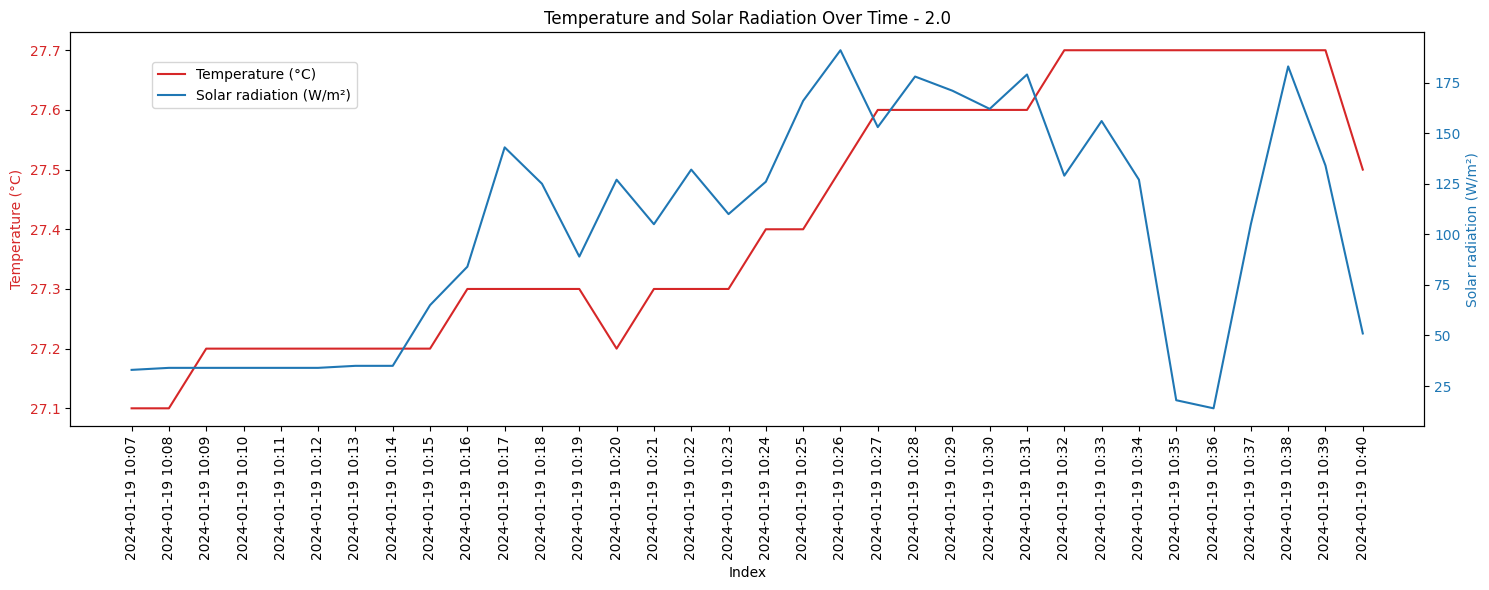

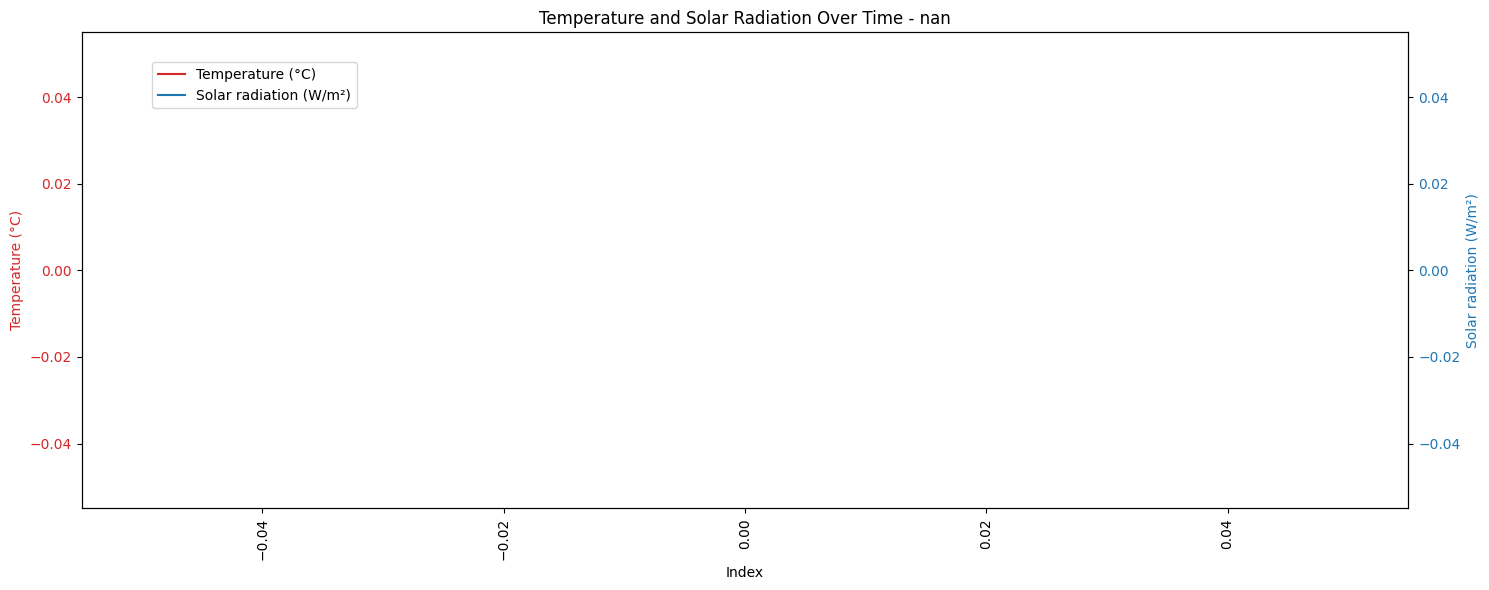

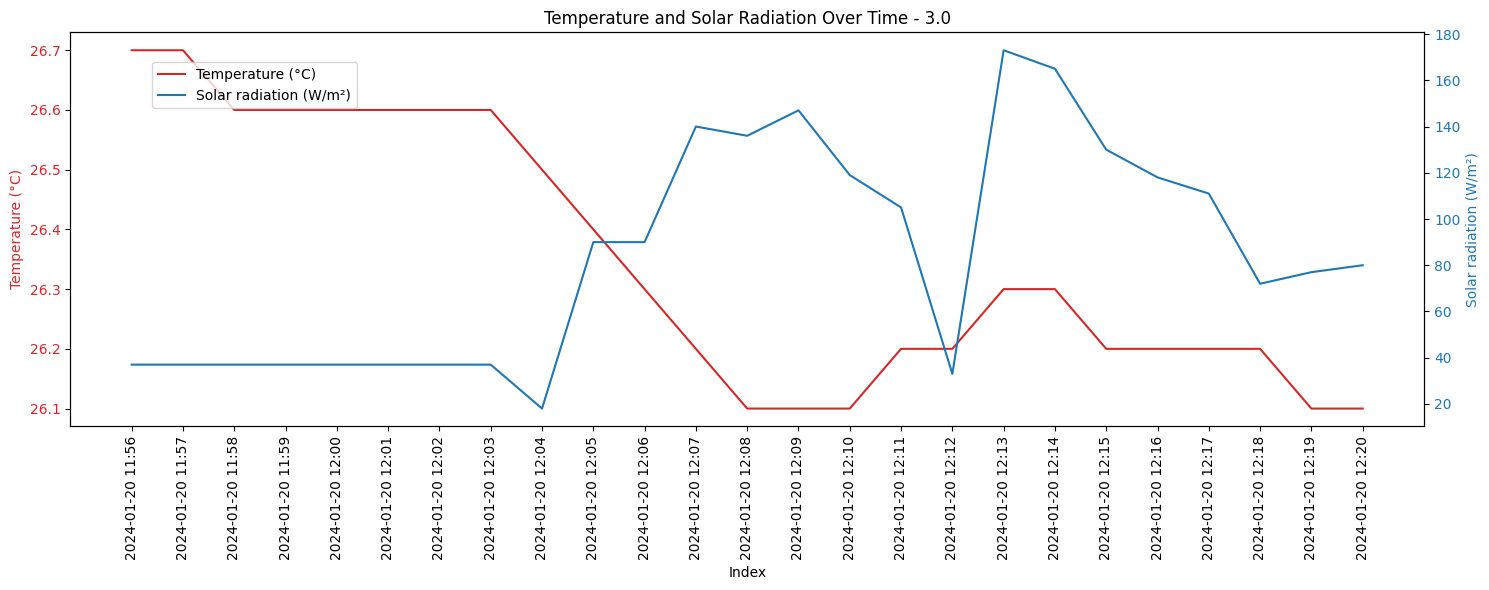

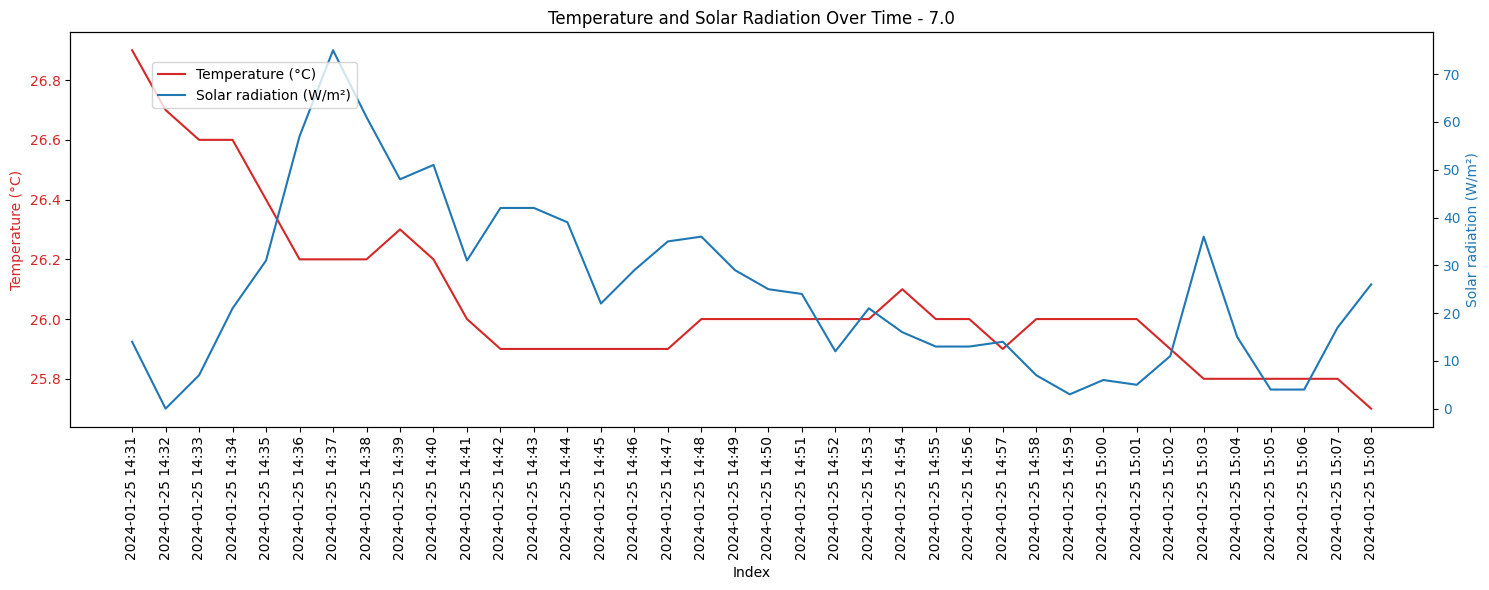

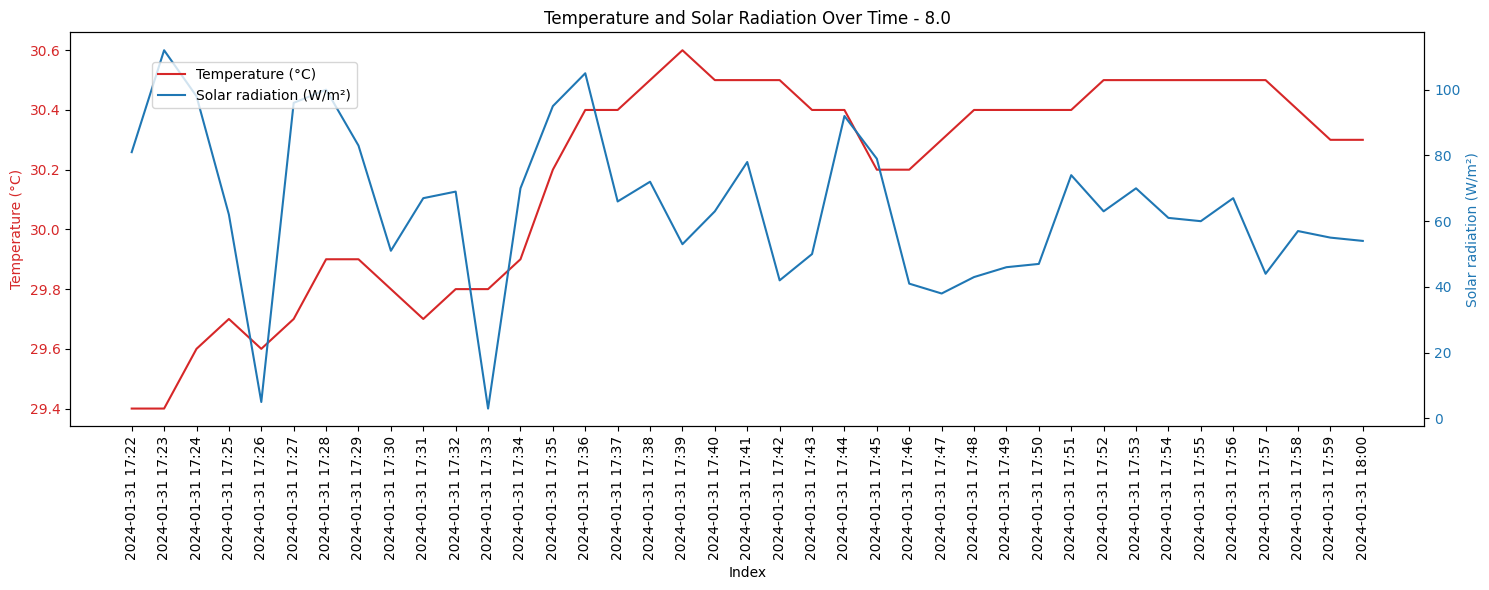

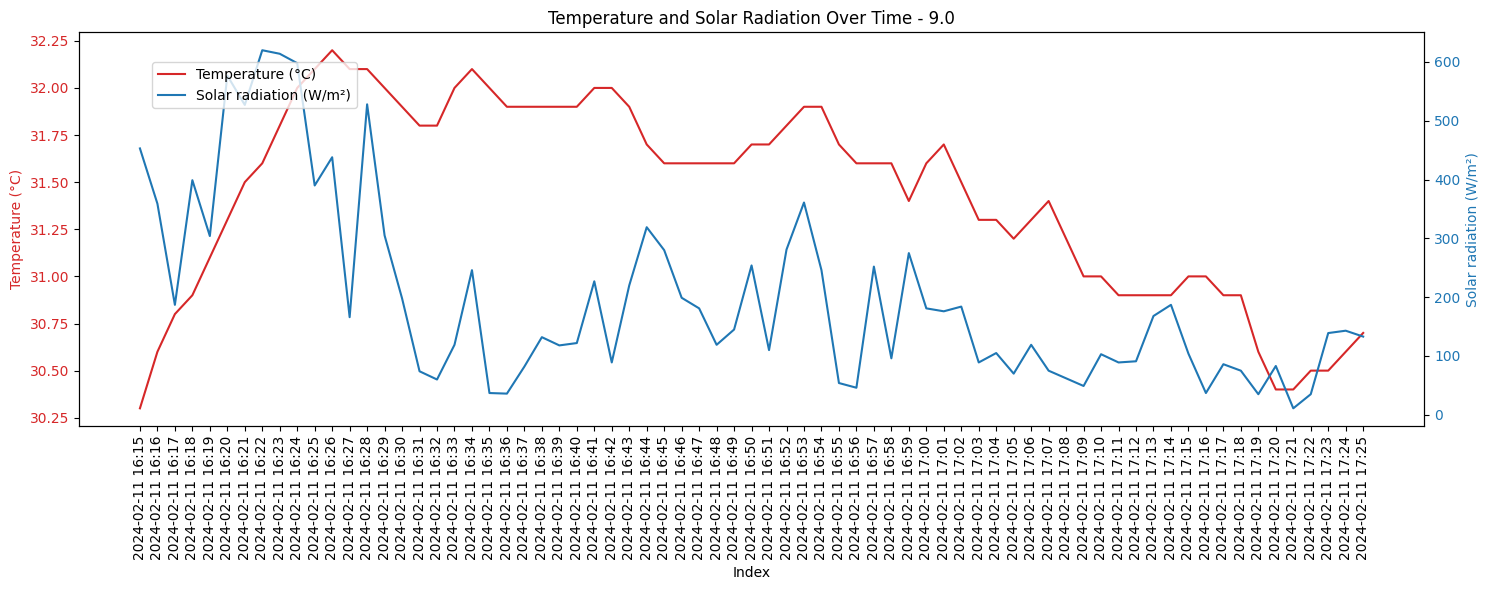

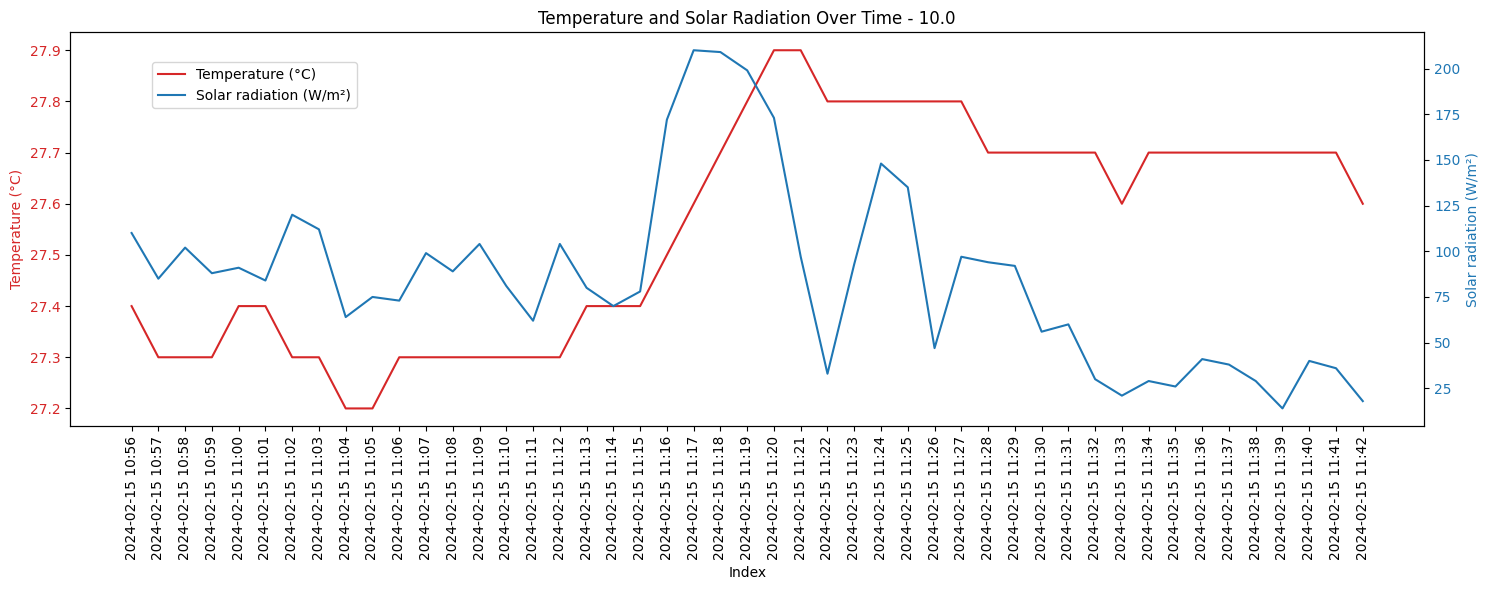

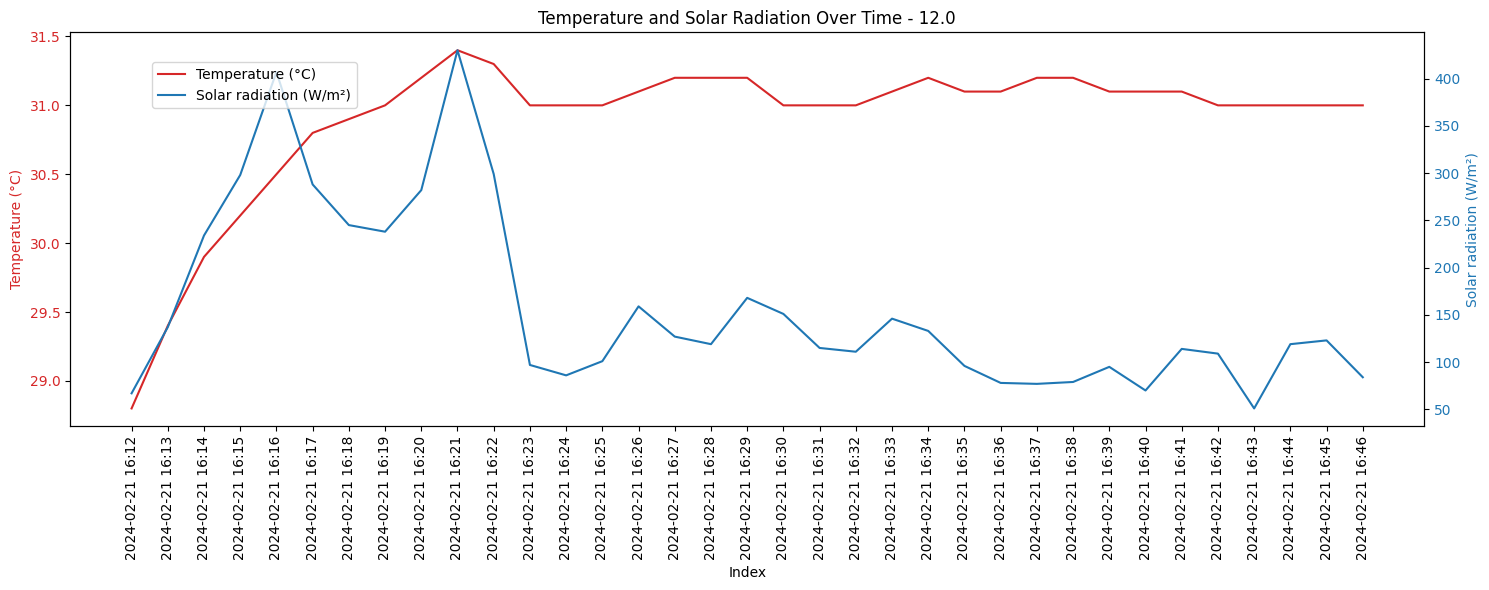

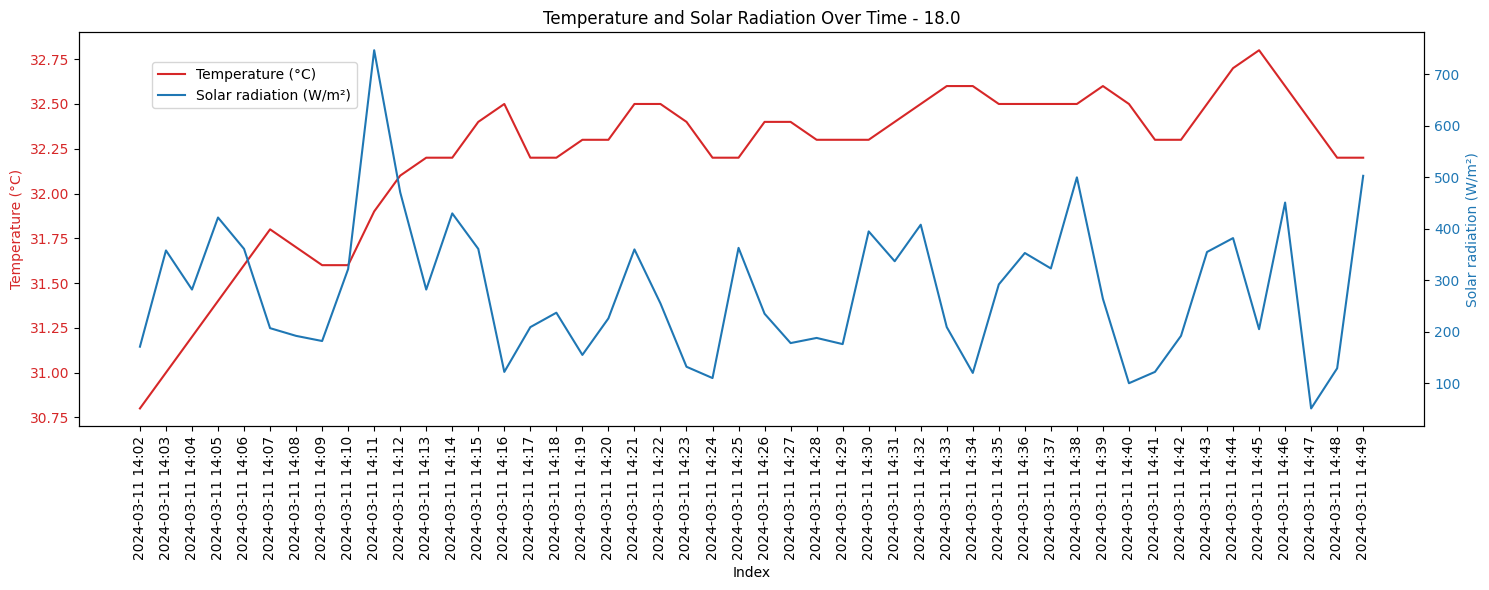

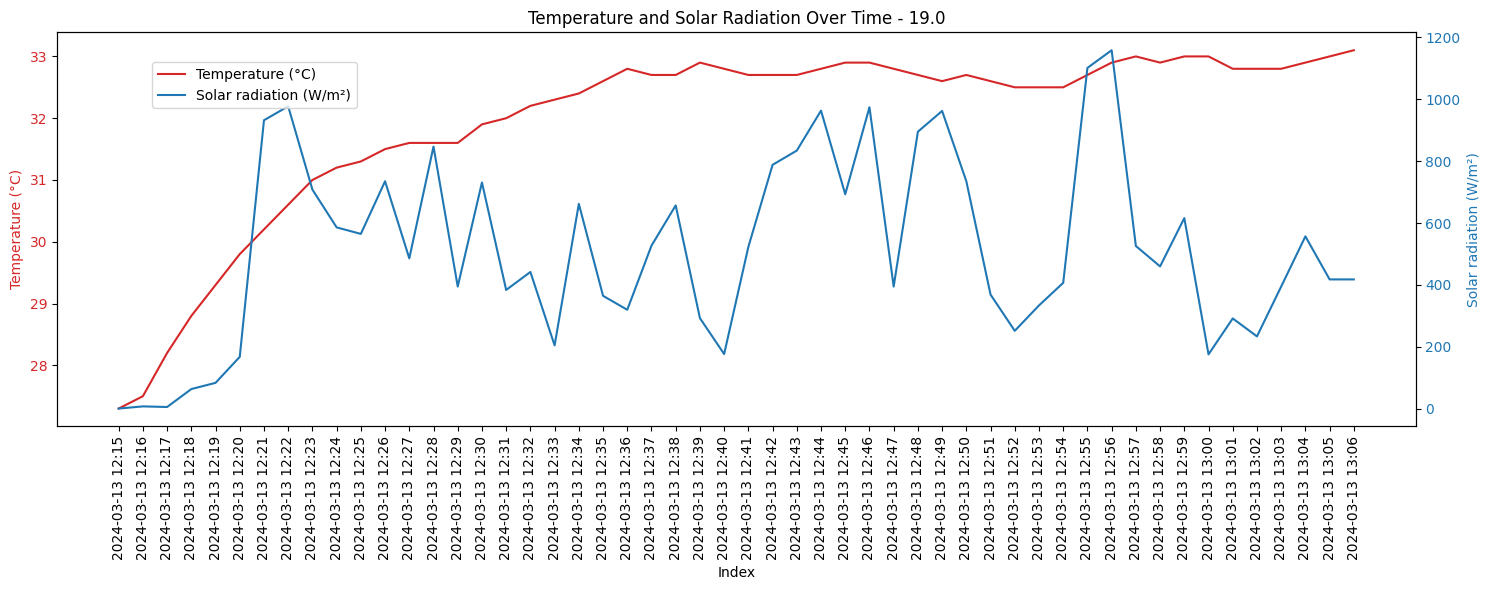

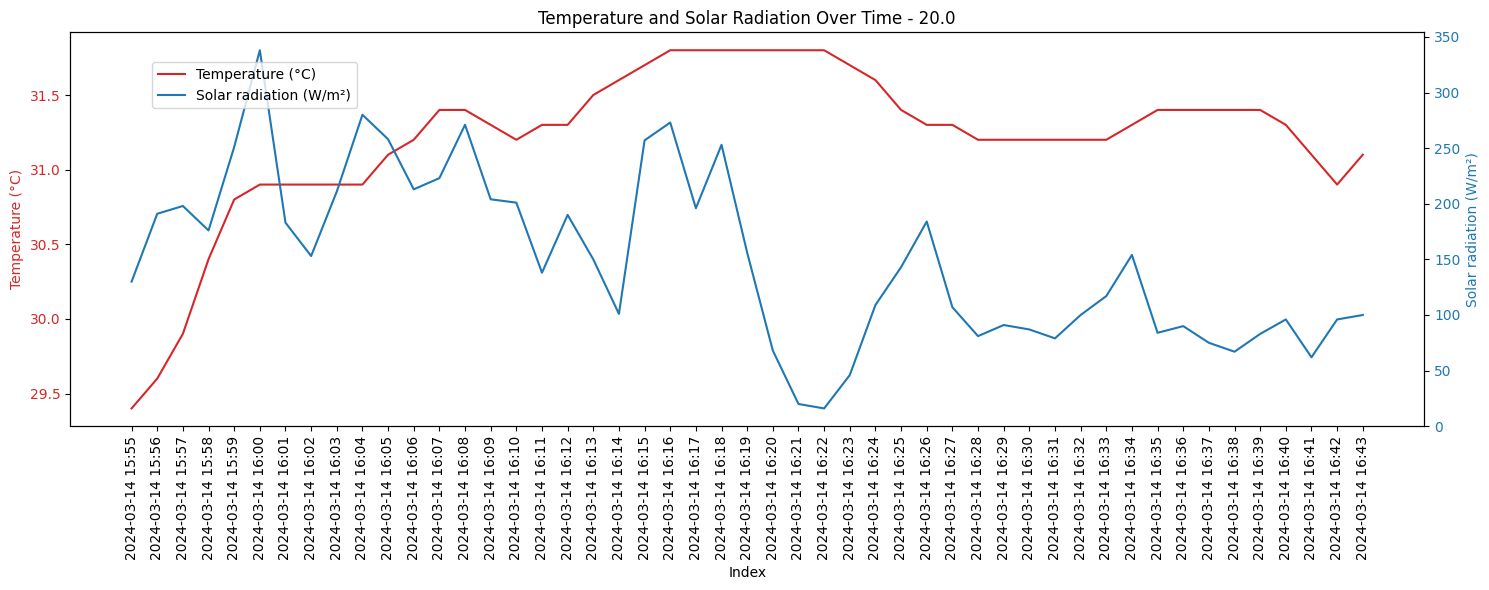

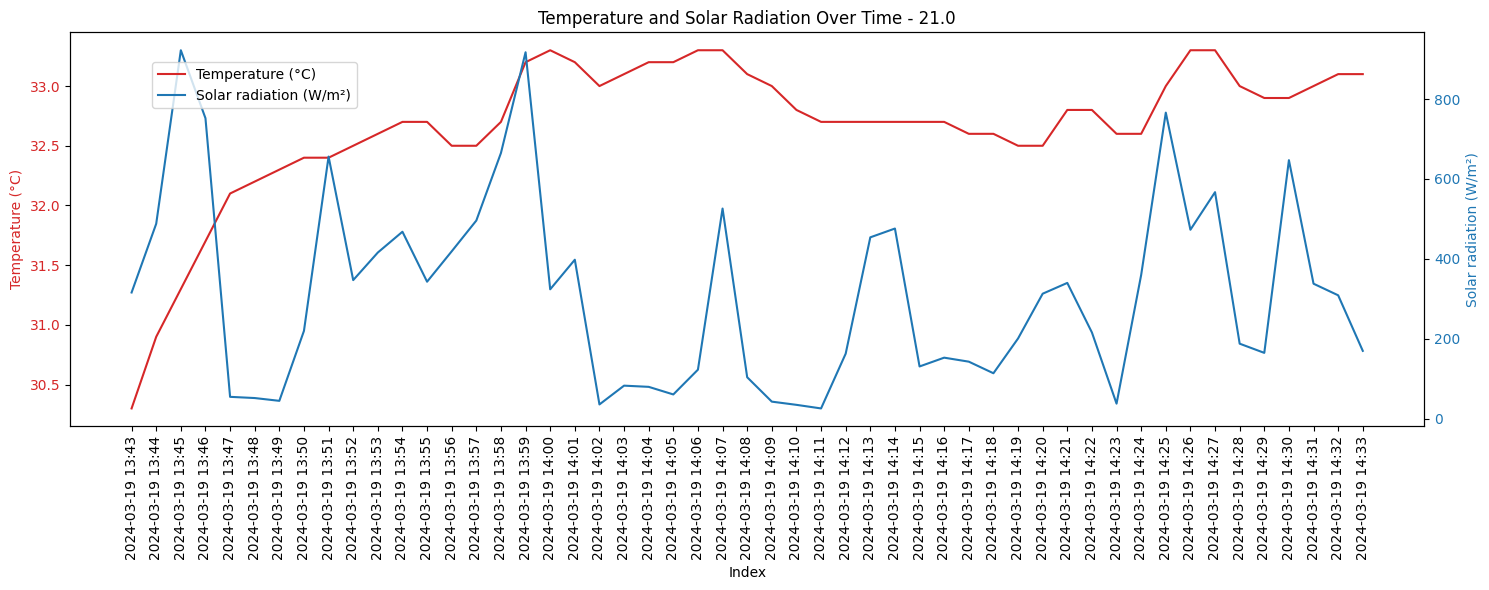

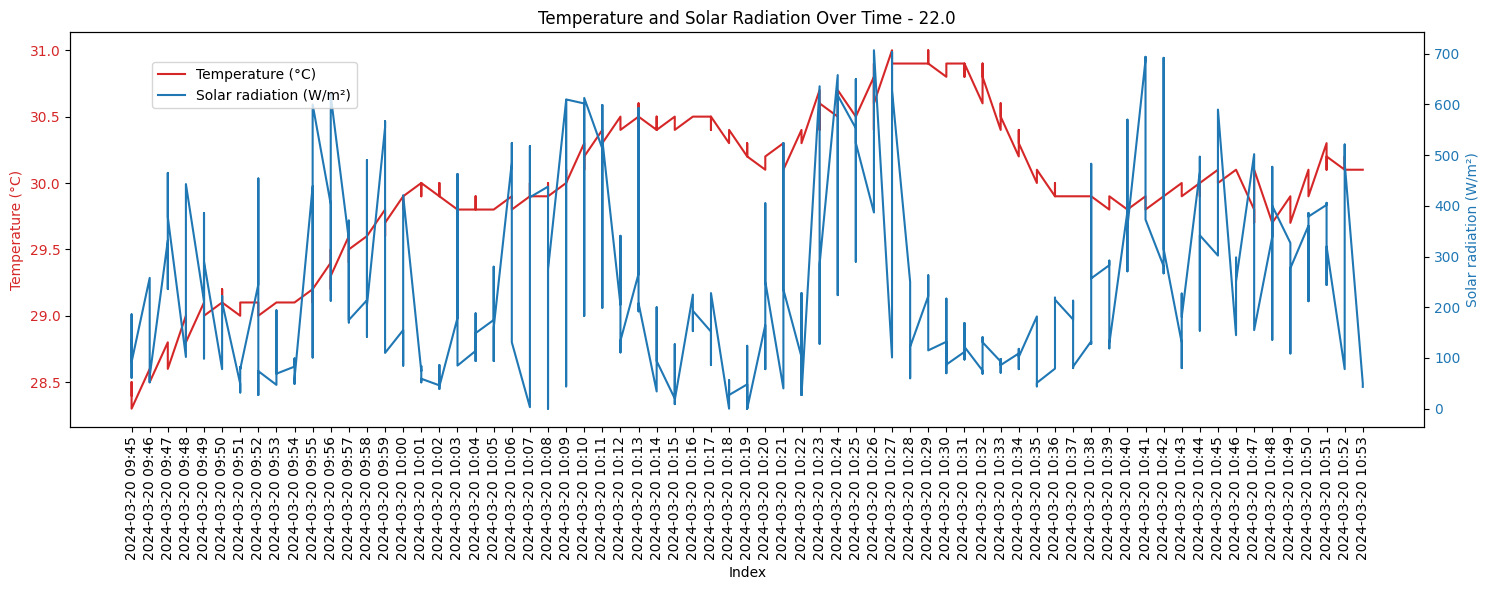

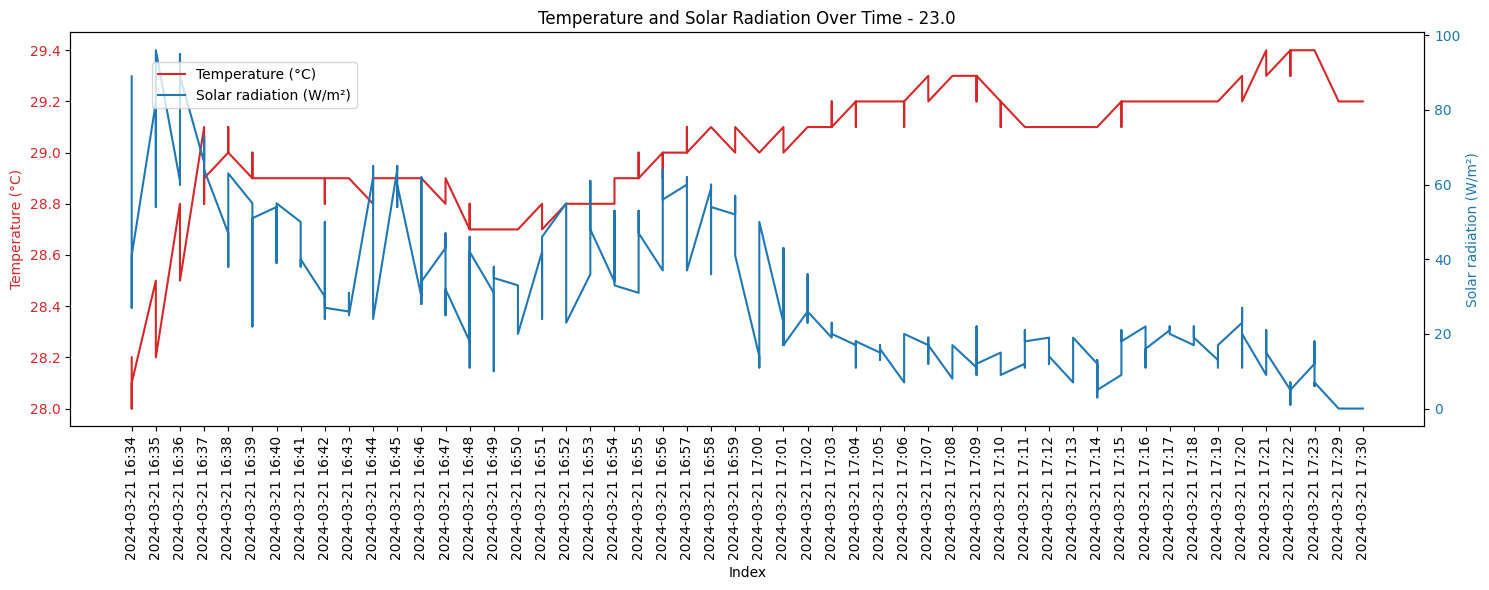

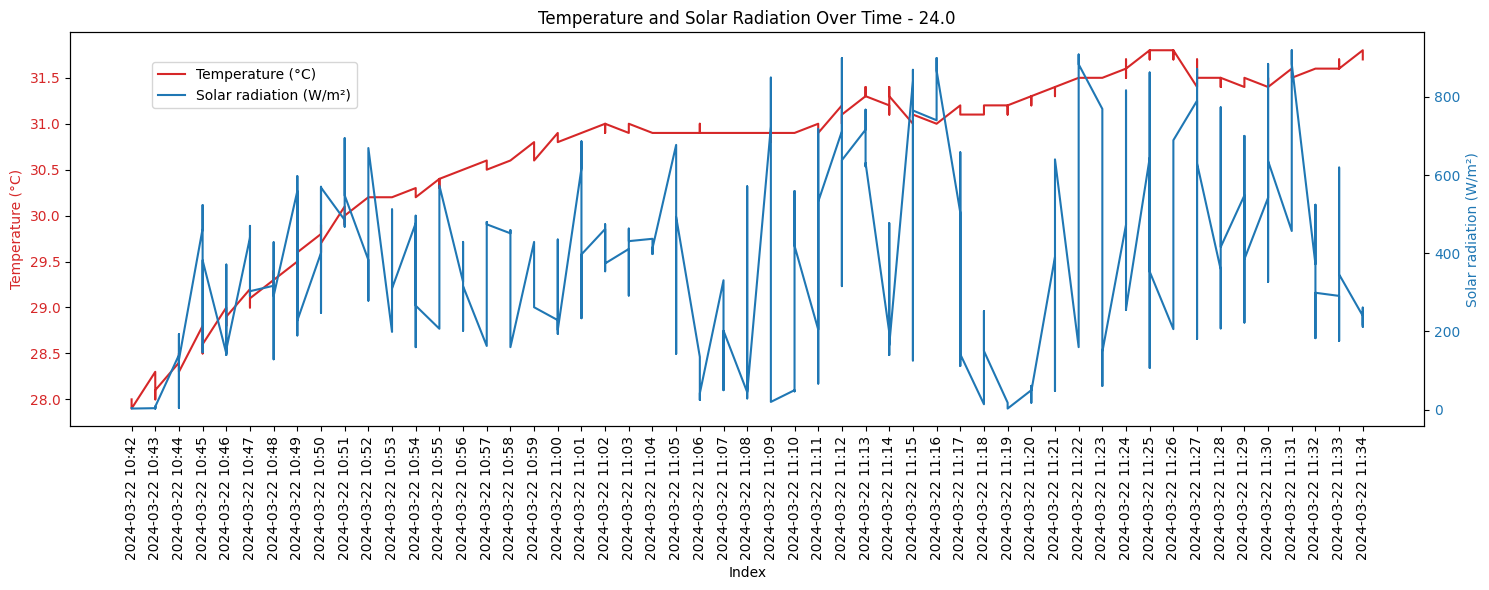

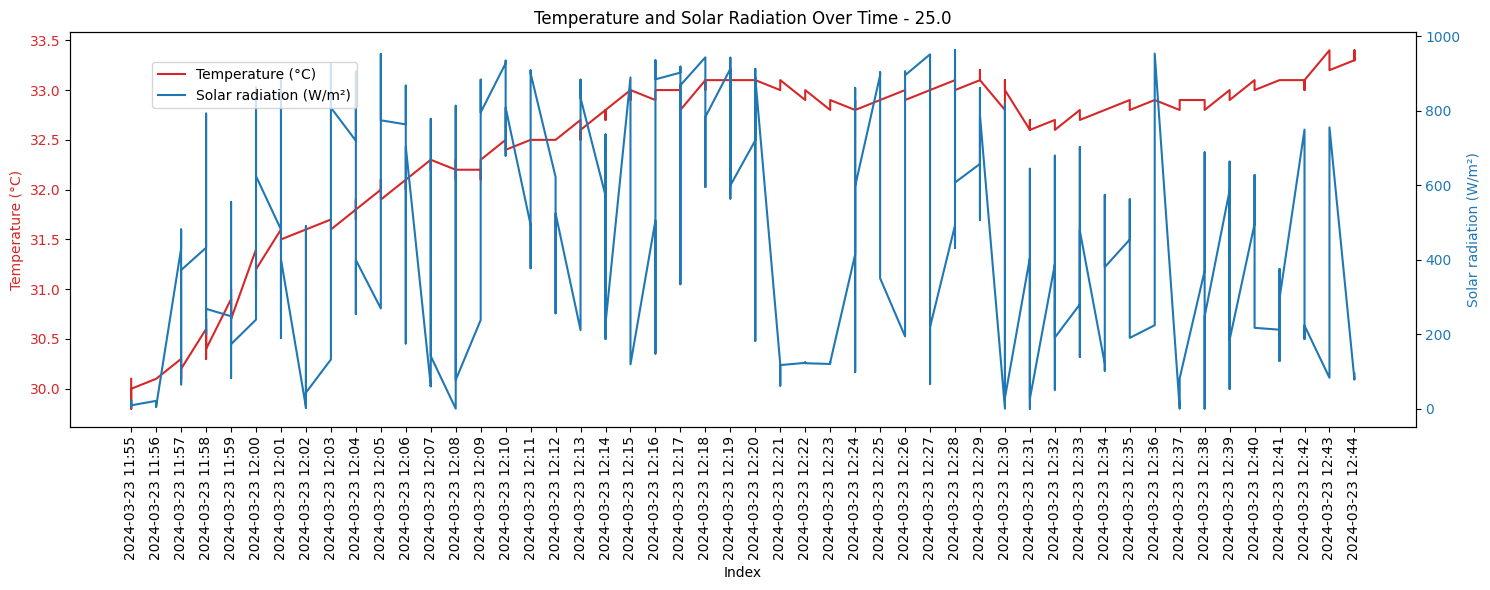

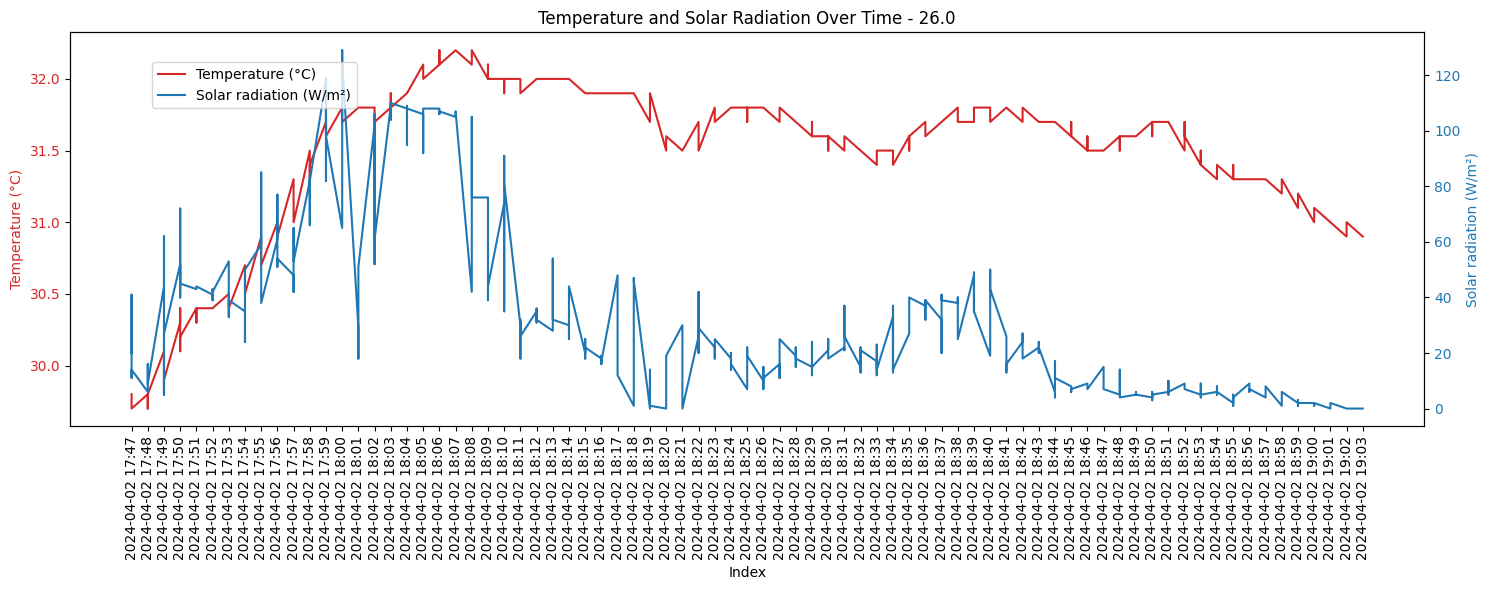

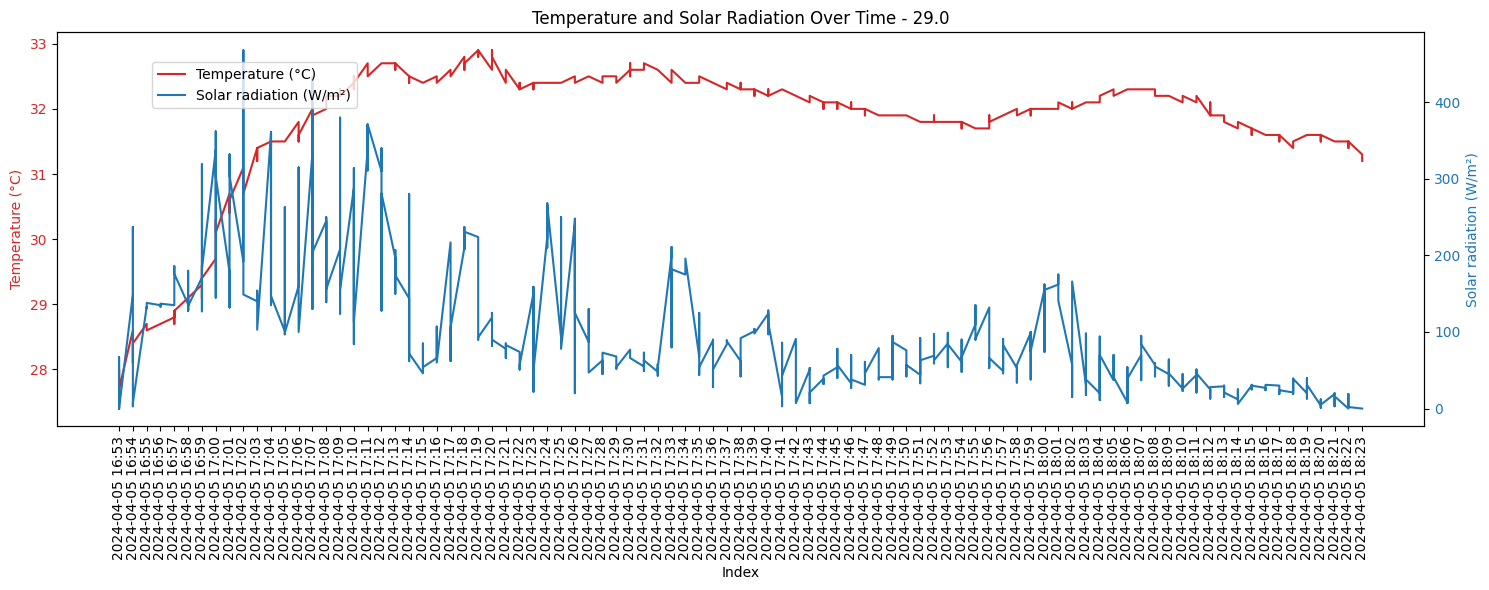

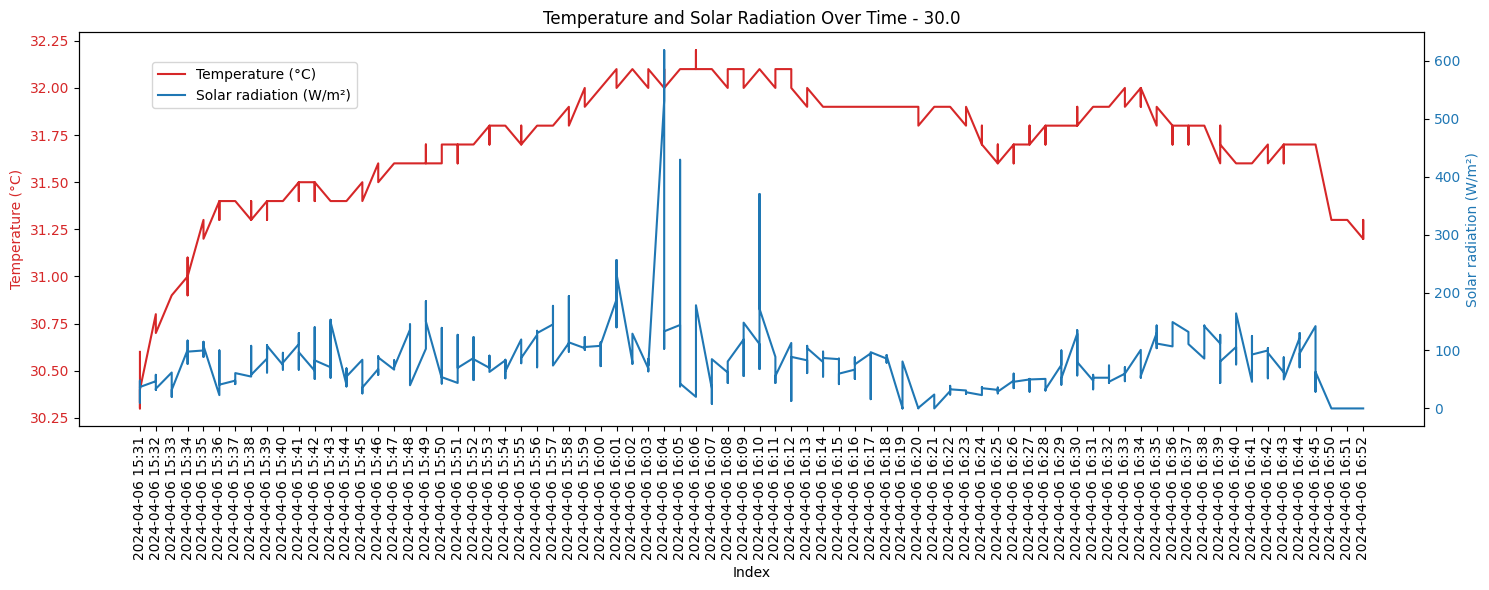

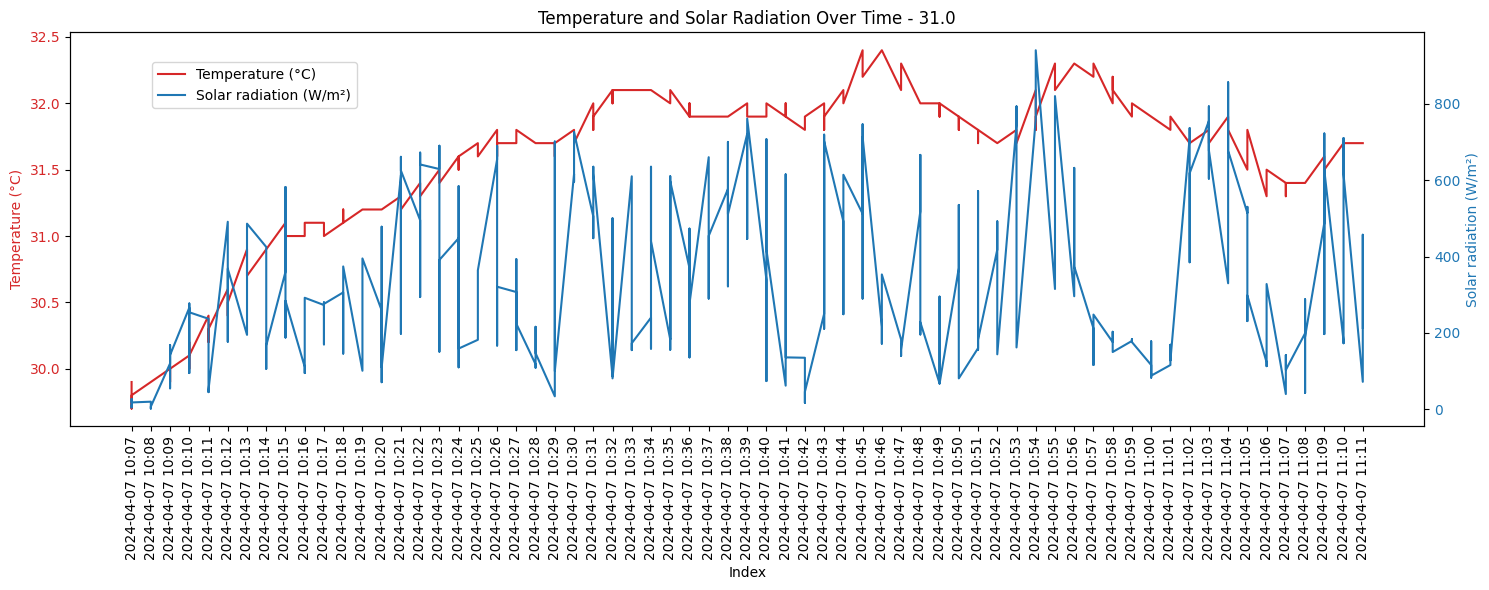

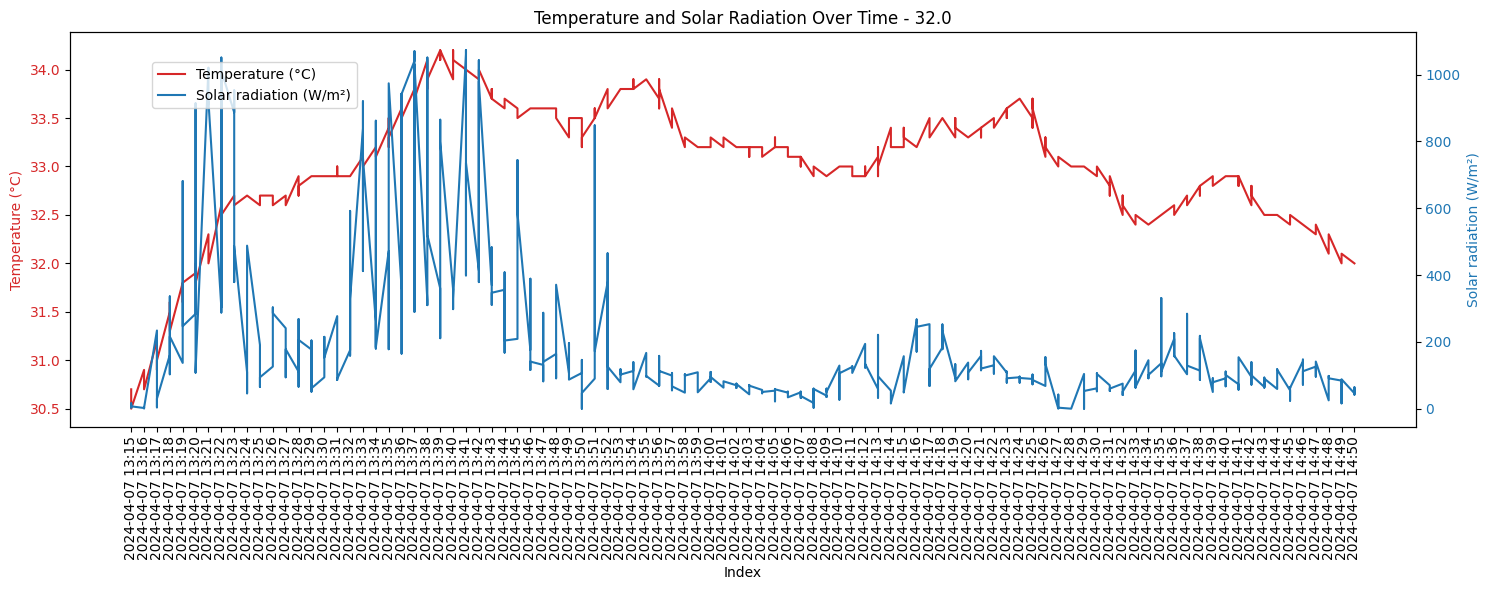

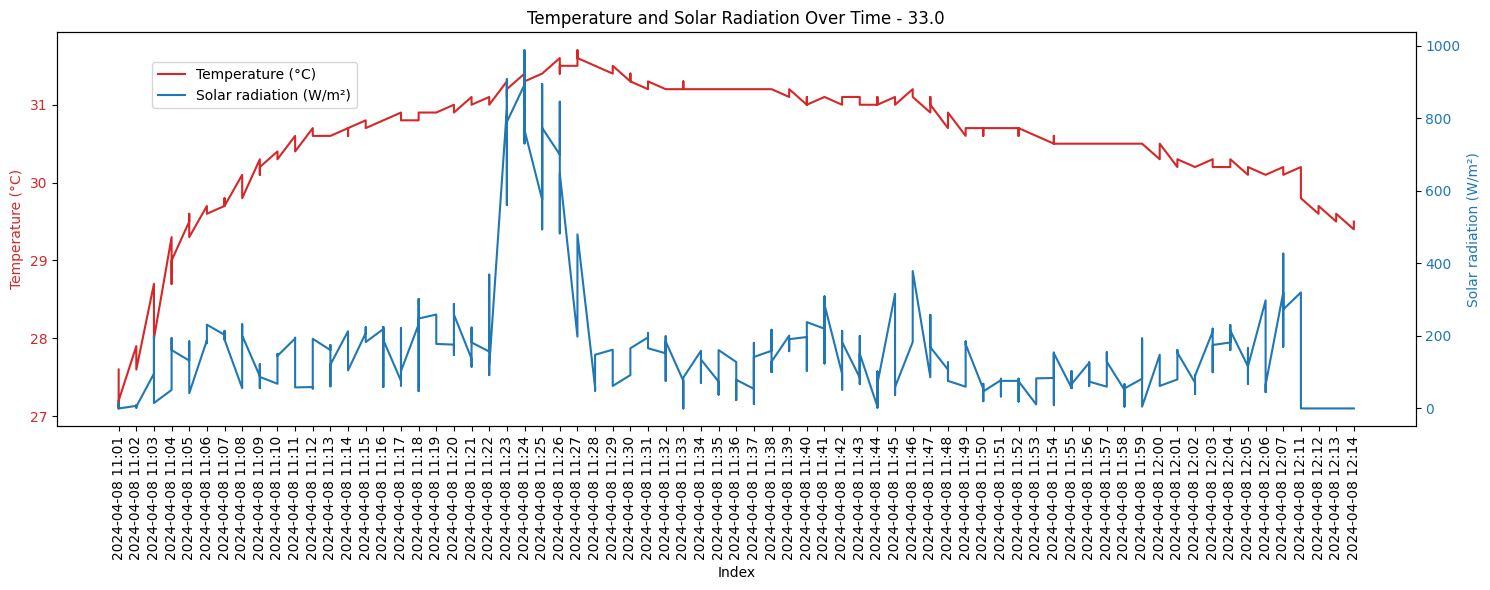

In [7]:
# Iterate over unique files and create separate plots for each one
unique_files = combined_df['tw_run_number'].unique()

for file_name in unique_files:
    # Filter data for the current file
    temp_data = combined_df[combined_df['tw_run_number'] == file_name]
    
    # Create a plot for the current file
    fig, ax1 = plt.subplots(figsize=(15, 6))
    
    # Plot temperature on primary axis
    ax1.plot(temp_data.index, temp_data['Temperature (°C)'], color='tab:red', label='Temperature (°C)')
    ax1.set_xlabel('Index')
    ax1.set_ylabel('Temperature (°C)', color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')
    #ax1.grid(True)
    
    # Create secondary axis for solar radiation
    ax2 = ax1.twinx()  
    ax2.plot(temp_data.index, temp_data['Solar radiation (W/m²)'], color='tab:blue', label='Solar radiation (W/m²)')
    ax2.set_ylabel('Solar radiation (W/m²)', color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    
    # Title and rotation
    plt.title(f'Temperature and Solar Radiation Over Time - {file_name}')
    plt.setp(ax1.get_xticklabels(), rotation=90)

    # Show legend
    fig.tight_layout()  
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    
    plt.show()

In [ ]:
#COZIE_MAIN_DF_esse00_filtered['index_time'] = pd.to_datetime(COZIE_MAIN_DF_esse00_filtered['index_time'])

# Resample the DataFrame to daily frequency and sum up the values for each day
COZIE_MAIN_DF_esse00_filtered['q_general_location_envi'].replace({'Outdoor': 1, 'Semi-Outdoor': 1}, inplace=True)
display(COZIE_MAIN_DF_esse00_filtered)

# Resample the DataFrame to daily frequency and sum up the values for each day
#daily_sum = COZIE_MAIN_DF_esse00_filtered.resample('D', on='index_time').sum()

#display(daily_sum)

In [ ]:
# First, ensure that the 'filename' column is categorical for better plotting
wst_df['file'] = wst_df['file'].astype('category')

# Create the boxplot with different colors for values containing "Detail02"
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='file', y='Temperature (°C)', data=wst_df, hue=wst_df['file'].str.contains('Detail02'))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('file')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution by Filename')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.legend(title='Contains Detail02', loc='upper right')  # Add legend
plt.show()

#-----------------

# Then, create the boxplot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.boxplot(x='file', y='Temperature (°C)', data=final_result_df, hue=final_result_df['file'].str.contains('Detail02'))
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('file')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Distribution by Filename')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
final_result_df['Hour'] = final_result_df['index_time'].dt.hour
final_result_df['Minute'] = final_result_df['index_time'].dt.minute

# Convert hour and minute to a single decimal value for Y-axis
final_result_df['Hour_Minute'] = final_result_df['Hour'] + final_result_df['Minute'] / 60.0

# Create the boxplot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.boxplot(x='file', y='Hour_Minute', data=final_result_df, hue=final_result_df['file'].str.contains('Detail02'))
plt.xticks(rotation=90) 
plt.xlabel('file')
plt.ylabel('Time of the Day (hour.minute)')
plt.title('Hourly Distribution of Data Access with Minute Variation')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

data_sum_per_filename = final_result_df.groupby('filenumber')['Globe T (°C)'].sum().reset_index()

print(data_sum_per_filename)